In [62]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)



In [63]:
import pandas as pd

df = pd.read_csv('../data/madrid/oficinas_turismo/206577-0-oficinas-turismo.csv', sep=';')
df.shape




(35, 33)

In [64]:
df['HORARIO'].isna().sum()

16

In [65]:
df.head(1)

,PK,NOMBRE,DESCRIPCION-ENTIDAD,HORARIO,EQUIPAMIENTO,TRANSPORTE,DESCRIPCION,ACCESIBILIDAD,CONTENT-URL,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,PLANTA,PUERTA,ESCALERAS,ORIENTACION,LOCALIDAD,PROVINCIA,CODIGO-POSTAL,COD-BARRIO,BARRIO,COD-DISTRITO,DISTRITO,COORDENADA-X,COORDENADA-Y,LATITUD,LONGITUD,TELEFONO,FAX,EMAIL,TIPO,Unnamed: 32
0,7805,Centro de Turismo Plaza Mayor,Madrid cuenta en el Salón de Columnas de la Casa de la Panadería de la céntrica Plaza Mayor con uno de los más modernos centros turísticos del país que ofrece atención especializada con una plantilla de profesionales expertos en turismo e idiomas que atiende personalmente a los visitantes y da respuesta también a todas las peticiones de información que se realizan de manera no presencial. Centro de turismo cofinanciado por el Fondo Europeo de Desarrollo Regional.,"Horario de atención al público de 9:30 a 20:30 horas, todos los días del año. Horario taquilla: martes a domingo de 10:30 a 14:30 y de 16:30 a 20:30 h. Lunes cerrado.","Atención presencial en varios idiomas Atención especializada Servicio de atención no presencial (teléfono 915 787 810 y email turismo@esmadrid.com) Atención por Whatsapp 619 111 094 Autoconsulta con folletos descargables mediante código QR Wifi gratuita Taquilla de Teatros Municipales (abierta de martes a domingo, de 10:30 a 14:30 y de 16:30 a 20:30 horas) Punto de venta del Madrid City Tour (solo pago con tarjeta de crédito) Tienda con recuerdos y artesanías madrileñas (solo pago con tarjeta de crédito) Accesibilidad: Programa de visitas guiadas accesibles (previa reserva) Lengua de Signos Española Bucles magnéticos (3) Encaminamientos podotáctiles Apoyos isquiáticos Plano háptico Mostrador adaptado Guía de Turismo Accesible Área tecnológica: Audiovisuales El Centro de Turismo de Plaza Mayor está certificado en la UNE 170001-2 de Accesibilidad Universal.","Metro: Sol (líneas 1, 2, 3), Ópera (línea 2, 5, Ramal) Bus: 17, 18, 23, 31, 50, 65 Renfe: Sol (líneas C3, C4) Bicimad: Estaciones 31 (calle Mayor, 20), 32 (plaza Provincia , 1 ) Parking: Plaza Mayor (55), Plaza Mayor",NaN,"1,4,5,6",http://www.madrid.es/sites/v/index.jsp?vgnextchannel=bfa48ab43d6bb410VgnVCM100000171f5a0aRCRD&vgnextoid=b0a093e5fd61c010VgnVCM1000000b205a0aRCRD,MAYOR,PLAZA,V,27,NaN,NaN,NaN,Casa de la Panadería,MADRID,MADRID,28012,6,SOL,1,CENTRO,439983,4474154,40.415839,-3.707426,915 787 810,NaN,turismo@esmadrid.com,/contenido/entidadesYorganismos/OficinasTurismo,


In [66]:
df["DISTRITO"].unique()

array(['CENTRO', 'CHAMBERI', 'SALAMANCA', 'RETIRO', 'CHAMARTIN',
       'MONCLOA-ARAVACA', 'TETUAN', 'BARAJAS', 'ARGANZUELA'], dtype=object)

In [67]:
df = df.loc[df["DISTRITO"].isin(["CENTRO", 'CHAMBERI', 'RETIRO','ARGANZUELA','SALAMANCA'])]

In [68]:
df.columns

Index(['PK', 'NOMBRE', 'DESCRIPCION-ENTIDAD', 'HORARIO', 'EQUIPAMIENTO',
       'TRANSPORTE', 'DESCRIPCION', 'ACCESIBILIDAD', 'CONTENT-URL',
       'NOMBRE-VIA', 'CLASE-VIAL', 'TIPO-NUM', 'NUM', 'PLANTA', 'PUERTA',
       'ESCALERAS', 'ORIENTACION', 'LOCALIDAD', 'PROVINCIA', 'CODIGO-POSTAL',
       'COD-BARRIO', 'BARRIO', 'COD-DISTRITO', 'DISTRITO', 'COORDENADA-X',
       'COORDENADA-Y', 'LATITUD', 'LONGITUD', 'TELEFONO', 'FAX', 'EMAIL',
       'TIPO', 'Unnamed: 32'],
      dtype='object')

In [69]:
df['DESCRIPCION-ENTIDAD'].isna().sum()

19

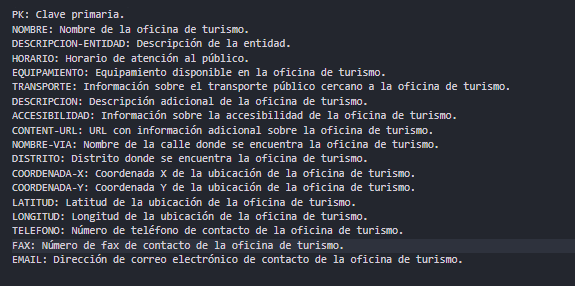

In [70]:
df['DESCRIPCION'].isna().sum()

24

In [71]:
pd.set_option('display.max_columns', None)

#### Añado columna ['DESCRIPCION-ENTIDAD','NOMBRE-VIA', 'CLASE-VIAL', 'TIPO-NUM', 'NUM', 'PLANTA', 'PUERTA','ESCALERAS', 'ORIENTACION', 'LOCALIDAD', 'PROVINCIA', 'CODIGO-POSTAL'] en df para segunda ronda de csv....

In [72]:
df = df[['NOMBRE-VIA', 'CLASE-VIAL', 'TIPO-NUM', 'NUM', 'PLANTA', 'PUERTA',
       'ESCALERAS', 'ORIENTACION', 'LOCALIDAD', 'PROVINCIA', 'CODIGO-POSTAL','NOMBRE','DESCRIPCION-ENTIDAD','TRANSPORTE','LATITUD','LONGITUD','COORDENADA-Y','COORDENADA-X','TELEFONO','EMAIL']]

In [73]:
df_TRANSPORTE = df[['TRANSPORTE']]

In [75]:
# Asumiendo que ya tienes un dataframe llamado df con una columna "TRANSPORTE"

# Crea una lista de medios de transporte
transportes = ['Metro', 'Bus', 'Renfe', 'Bicimad', 'Parking', 'Aparcamiento']

# Crea una columna para cada medio de transporte
for transporte in transportes:
    df[transporte] = ''

# Itera sobre cada fila del dataframe
for i, row in df.iterrows():
    # Divide la cadena en la columna "TRANSPORTE" en diferentes partes
    partes = row['TRANSPORTE'].split()
    # Inicializa una variable para almacenar el medio de transporte actual
    transporte_actual = ''
    # Inicializa una variable para almacenar la información del medio de transporte actual
    info_transporte = ''
    # Itera sobre cada parte de la cadena
    for parte in partes:
        # Si la parte es un medio de transporte
        if parte.rstrip(':') in transportes:
            # Si ya hay información almacenada en la variable info_transporte
            if info_transporte:
                # Asigna la información a la columna correspondiente
                df.at[i, transporte_actual] = info_transporte.strip()
                # Reinicia la variable info_transporte
                info_transporte = ''
            # Actualiza el valor de la variable transporte_actual
            transporte_actual = parte.rstrip(':')
        else:
            # Agrega la parte a la variable info_transporte
            info_transporte += parte + ' '
    # Asigna la información restante a la columna correspondiente
    df.at[i, transporte_actual] = info_transporte.strip()

# Muestra el resul

In [76]:
df = df.drop(columns='TRANSPORTE')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 34
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOMBRE-VIA           26 non-null     object 
 1   CLASE-VIAL           26 non-null     object 
 2   TIPO-NUM             26 non-null     object 
 3   NUM                  26 non-null     int64  
 4   PLANTA               8 non-null      object 
 5   PUERTA               5 non-null      object 
 6   ESCALERAS            0 non-null      float64
 7   ORIENTACION          6 non-null      object 
 8   LOCALIDAD            26 non-null     object 
 9   PROVINCIA            26 non-null     object 
 10  CODIGO-POSTAL        26 non-null     int64  
 11  NOMBRE               26 non-null     object 
 12  DESCRIPCION-ENTIDAD  7 non-null      object 
 13  LATITUD              26 non-null     float64
 14  LONGITUD             26 non-null     float64
 15  COORDENADA-Y         26 non-null     int64  
 1

In [78]:
df['COORDENADA-X'].isna().sum()

0

In [79]:
df['COORDENADA-Y'].isna().sum()


0

In [80]:
df.head(1)

,NOMBRE-VIA,CLASE-VIAL,TIPO-NUM,NUM,PLANTA,PUERTA,ESCALERAS,ORIENTACION,LOCALIDAD,PROVINCIA,CODIGO-POSTAL,NOMBRE,DESCRIPCION-ENTIDAD,LATITUD,LONGITUD,COORDENADA-Y,COORDENADA-X,TELEFONO,EMAIL,Metro,Bus,Renfe,Bicimad,Parking,Aparcamiento
0,MAYOR,PLAZA,V,27,NaN,NaN,NaN,Casa de la Panadería,MADRID,MADRID,28012,Centro de Turismo Plaza Mayor,Madrid cuenta en el Salón de Columnas de la Casa de la Panadería de la céntrica Plaza Mayor con uno de los más modernos centros turísticos del país que ofrece atención especializada con una plantilla de profesionales expertos en turismo e idiomas que atiende personalmente a los visitantes y da respuesta también a todas las peticiones de información que se realizan de manera no presencial. Centro de turismo cofinanciado por el Fondo Europeo de Desarrollo Regional.,40.415839,-3.707426,4474154,439983,915 787 810,turismo@esmadrid.com,"Sol (líneas 1, 2, 3), Ópera (línea 2, 5, Ramal)","17, 18, 23, 31, 50, 65","Sol (líneas C3, C4)","Estaciones 31 (calle Mayor, 20), 32 (plaza Provincia , 1 )","Plaza Mayor (55), Plaza Mayor",


In [81]:
df.shape

(26, 25)

In [56]:
# df.to_json('Tourist_office.json', orient='records', force_ascii=False)

In [ ]:
# import xml.etree.ElementTree as ET

# # Reemplaza 'archivo.xml' con la ruta al archivo XML que deseas leer
# tree = ET.parse('sheet1.xml')
# root = tree.getroot()

# # Procesar el contenido del archivo XML aquí
# # Por ejemplo, imprimir el nombre de la etiqueta raíz y sus atributos
# print(f'Etiqueta raíz: {root.tag}')
# print(f'Atributos: {root.attrib}')


### Nuevo enfoque, quieren todo en un .json, unificaremos columnas y los propios json en cada cosa. Solo 4 columnas tipo,nombre,direccion,coordenada-x,coordenada-y latitud,longitud y descripcion

In [82]:
df["CODIGO-POSTAL"] = df["CODIGO-POSTAL"].fillna("No disponible")
df["NUM"] = df["NUM"].fillna("No disponible")
df['NUM'] = pd.to_numeric(df['NUM'], errors='coerce')
df['NUM'] = df['NUM'].astype(pd.Int64Dtype(), errors='ignore')
df['CODIGO-POSTAL'] = pd.to_numeric(df['CODIGO-POSTAL'], errors='coerce')
df['CODIGO-POSTAL'] = df['CODIGO-POSTAL'].astype(pd.Int64Dtype(), errors='ignore')

In [83]:
def concatenar_fila(row):
    return f"{row['CLASE-VIAL']} {row['NOMBRE-VIA']} {row['NUM']}, {row['LOCALIDAD']}, {row['CODIGO-POSTAL']}"

# Crear la nueva columna "DIRECCION" aplicando la función a lo largo de las filas
df['DIRECCION'] = df.apply(concatenar_fila, axis=1)

In [84]:
df.columns

Index(['NOMBRE-VIA', 'CLASE-VIAL', 'TIPO-NUM', 'NUM', 'PLANTA', 'PUERTA',
       'ESCALERAS', 'ORIENTACION', 'LOCALIDAD', 'PROVINCIA', 'CODIGO-POSTAL',
       'NOMBRE', 'DESCRIPCION-ENTIDAD', 'LATITUD', 'LONGITUD', 'COORDENADA-Y',
       'COORDENADA-X', 'TELEFONO', 'EMAIL', 'Metro', 'Bus', 'Renfe', 'Bicimad',
       'Parking', 'Aparcamiento', 'DIRECCION'],
      dtype='object')

In [85]:
df.drop(['NOMBRE-VIA', 'CLASE-VIAL', 'TIPO-NUM', 'NUM', 'PLANTA', 'PUERTA',
       'ESCALERAS', 'ORIENTACION', 'LOCALIDAD', 'PROVINCIA', 'CODIGO-POSTAL','COORDENADA-Y',
       'COORDENADA-X', 'TELEFONO', 'EMAIL'],axis = 1,inplace=True)

In [86]:
df.columns

Index(['NOMBRE', 'DESCRIPCION-ENTIDAD', 'LATITUD', 'LONGITUD', 'Metro', 'Bus',
       'Renfe', 'Bicimad', 'Parking', 'Aparcamiento', 'DIRECCION'],
      dtype='object')

In [87]:
df["TIPO"] = "OFICINAS_TURISMO"

In [88]:
df.rename(columns={'DESCRIPCION-ENTIDAD': 'DESCRIPCION'}, inplace=True)

In [89]:
nuevo_orden_columnas = ["TIPO","NOMBRE","DIRECCION","DESCRIPCION","LATITUD","LONGITUD"] 
df = df.reindex(columns=nuevo_orden_columnas)

In [90]:
df["DESCRIPCION"] = df["DESCRIPCION"].fillna("No disponible")

In [91]:
df.head()

,TIPO,NOMBRE,DIRECCION,DESCRIPCION,LATITUD,LONGITUD
0,OFICINAS_TURISMO,Centro de Turismo Plaza Mayor,"PLAZA MAYOR 27, MADRID, 28012",Madrid cuenta en el Salón de Columnas de la Casa de la Panadería de la céntrica Plaza Mayor con uno de los más modernos centros turísticos del país que ofrece atención especializada con una plantilla de profesionales expertos en turismo e idiomas que atiende personalmente a los visitantes y da respuesta también a todas las peticiones de información que se realizan de manera no presencial. Centro de turismo cofinanciado por el Fondo Europeo de Desarrollo Regional.,40.415839,-3.707426
1,OFICINAS_TURISMO,Centro de Turismo de Sol. Comunidad de Madrid,"PLAZA PUERTA DEL SOL 5, MADRID, 28013",No disponible,40.416618,-3.702830
2,OFICINAS_TURISMO,Madrid Film Office,"PLAZA MAYOR 27, MADRID, 28012","Madrid Film Office es un servicio público del Ayuntamiento de Madrid que tiene como misión promocionar la ciudad como escenario de rodaje de producciones audiovisuales, asistir a las empresas y a los profesionales que eligen la ciudad de Madrid para llevar a cabo sus proyectos, apoyar al sector audiovisual madrileño y estimular la inversión y el desarrollo local. Madrid Film Office colabora desde la fase de preproducción para facilitar la búsqueda de localizaciones, te asesora en materia de permisos y te acompaña durante el desarrollo de los proyectos audiovisuales en la ciudad de Madrid. La oficina está abierta a consultas y solicitudes de asistencia por vía telefónica o email. Si deseas una atención presencial, solicita cita previa a través del correo electrónico info@madridfilmoffice.com.",40.415794,-3.707411
3,OFICINAS_TURISMO,Oficina Joven Comunidad de Madrid. TIVE. Moncloa,"CALLE FERNANDO EL CATOLICO 88, MADRID, 28015",No disponible,40.434423,-3.717795
4,OFICINAS_TURISMO,Oficina de Turismo de Andalucía en Madrid,"AVENIDA FELIPE II 15, MADRID, 28009",No disponible,40.424184,-3.673810


In [92]:
df.to_csv("../data/madrid/oficinas_turismo/tourist_office_nuevo_reduced.csv", index=False)